In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/Users/freestylebk/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Listing 4.1

In [15]:
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
# 형성한 x 데이터를 합쳐서 하나의 행렬로 만듦.
xs = np.append(x_label0, x_label1)
# label이 0인 것, label이 1인 것 각각 label 형성
labels = [0.]*len(x_label0) + [1.]*len(x_label1)

# 만든 dataset을 그래프에 뿌려주기
plt.scatter(xs, labels)

learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder("float")
Y = tf.placeholder("float")

# y=w1*x + w0 모델을 만드는 것
def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X,1)), tf.multiply(w[0], tf.pow(X, 0)))

w = tf.Variable([0., 0.], name="parameters")
y_model = model(X, w)
cost = tf.reduce_sum(tf.square(Y-y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### Listing 4.2

0 8.233812
100 3.2648022
200 1.5950519
300 1.0160451
400 0.81526816
500 0.7456457
600 0.7215034
700 0.7131319
800 0.71022886
900 0.70922214
learned parameters [ 1.6455231 -0.3004839]
accuracy 1.0


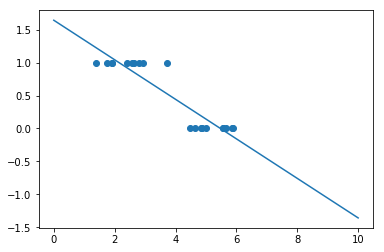

In [16]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(train_op, feed_dict={X:xs, Y:labels})
    current_cost = sess.run(cost, feed_dict={X:xs, Y:labels})
    # 100으로 떨어지는 training epoch때의 cost 값 출력
    if epoch % 100 ==0 :
        print(epoch, current_cost)
        
w_val = sess.run(w)
print('learned parameters', w_val)

# listing 4.3 구문. accuracy 체크
# y_model 값이 0.5를 기준으로 크면 1, 크지 않으면 0으로 한 다음 실제값 Y와 같으면 prediction을 1, 틀렸으면 0으로 주는 과정
correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))
# prediction 값을 평균내서 accuracy 구하기
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))
print('accuracy', sess.run(accuracy, feed_dict={X:xs, Y:labels}))

sess.close()

all_xs = np.linspace(0, 10, 100)
plt.plot(all_xs, all_xs*w_val[1]+w_val[0])
plt.show()

### Listing 4.4

0 9.306671
100 3.5136108
200 3.4018538
300 3.3996663
400 3.3996234
500 3.3996227
600 3.399623
700 3.3996227
800 3.3996227
900 3.3996227
learned parameters [ 0.78618574 -0.06872367]
accuracy 0.9


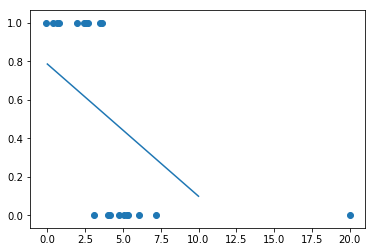

In [18]:
# x_label0 값에 큰 값(20)을 추가하면서 linear regression을 사용하면 |x|가 커질 때 기울기가 크게 차이남을 보여준다.
# 이렇게 너무 sensative하면 classification(y=0.5 지점)이 상황마다 변하게 된다.
x_label0 = np.append(np.random.normal(5, 1, 9), 20)
x_label1 = np.random.normal(2, 1, 10)

xs = np.append(x_label0, x_label1)

labels = [0.]*len(x_label0) + [1.]*len(x_label1)

plt.scatter(xs, labels)

learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder("float")
Y = tf.placeholder("float")

def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X,1)), tf.multiply(w[0], tf.pow(X, 0)))

w = tf.Variable([0., 0.], name="parameters")
y_model = model(X, w)
cost = tf.reduce_sum(tf.square(Y-y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(train_op, feed_dict={X:xs, Y:labels})
    current_cost = sess.run(cost, feed_dict={X:xs, Y:labels})
    if epoch % 100 ==0 :
        print(epoch, current_cost)
        
w_val = sess.run(w)
print('learned parameters', w_val)

correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))
print('accuracy', sess.run(accuracy, feed_dict={X:xs, Y:labels}))

sess.close()

all_xs = np.linspace(0, 10, 100)
plt.plot(all_xs, all_xs*w_val[1]+w_val[0])
plt.show()

### Listing 4.5

0 0.69314593
1 0.6542297
2 0.6190841
3 0.5873183
4 0.55856836
5 0.53250146
6 0.50881743
7 0.4872488
8 0.46755818
9 0.4495364
10 0.4329994
11 0.41778624
12 0.40375528
13 0.3907827
14 0.3787598
15 0.36759102
16 0.35719258
17 0.34749037
18 0.338419
19 0.3299203
20 0.32194367
21 0.31444293
22 0.30737767
23 0.3007116
24 0.29441214
25 0.28845
26 0.28279924
27 0.27743605
28 0.27233905
29 0.2674889
30 0.26286814
31 0.25846067
32 0.25425205
33 0.25022915
34 0.24637973
35 0.24269272
36 0.23915796
37 0.23576601
38 0.23250838
39 0.22937714
40 0.22636493
41 0.22346503
42 0.22067097
43 0.2179773
44 0.21537836
45 0.21286914
46 0.21044514
47 0.20810193
48 0.2058354
49 0.2036418
50 0.20151757
51 0.19945936
52 0.19746415
53 0.19552901
54 0.19365117
55 0.19182806
56 0.19005732
57 0.18833655
58 0.18666369
59 0.18503681
60 0.18345371
61 0.18191282
62 0.1804124
63 0.17895082
64 0.17752646
65 0.17613803
66 0.17478403
67 0.17346321
68 0.17217429
69 0.17091613
70 0.16968752
71 0.16848761
72 0.16731521
73 0.166

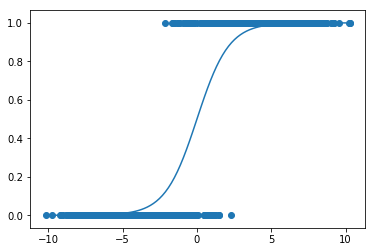

In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

learning_rate = 0.01
training_epochs = 1000

# logistic regression을 위해 sigmoid 함수 정의
def sigmoid(x) :
    return 1./(1. + np.exp(-x))

# 평균이 -4, 4이고 표준편차가 2인 x를 각각 1000개씩 random하게 생성
x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.]*len(x1) + [1.]*len(x2))

plt.scatter(xs, ys)

X = tf.placeholder(tf.float32, shape=(None,), name = "x")
Y = tf.placeholder(tf.float32, shape=(None,), name = "y")
# If trainable is True, the default, also adds the variable to the graph collection GraphKeys
w = tf.Variable([0., 0.], name = "parameter", trainable=True)
# sigmoid 함수로 model정의
y_model = tf.sigmoid(w[1]*X+w[0])
# sigmoid 함수에 맞는 cost function
cost = tf.reduce_mean(-Y*tf.log(y_model) - (1-Y)*tf.log(1-y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs) :
        # cost와 train_op을 동시에 sess하고 err, _에 할당
        err, _ = sess.run([cost, train_op], {X:xs, Y:ys})
        print(epoch, err)
        # cost가 거의 변하지 않으면 convex 지점에 왔다고 생각하고 연산 끝내기
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X:xs, Y:ys})
    
all_xs = np.linspace(-10, 10, 100)
# 책에 오타. sigmoid 정의할 때 -를 이미 붙였기 때문에 -없이 입력해야 함.
plt.plot(all_xs, sigmoid(all_xs*w_val[1]+w_val[0]))
plt.show()

### Listing 4.6

0 0.69314593
1 0.61005485
2 0.60312074
3 0.5982508
4 0.5935116
5 0.5888893
6 0.58437926
7 0.5799768
8 0.57567817
9 0.57147914
10 0.56737554
11 0.5633637
12 0.55944043
13 0.5556016
14 0.55184454
15 0.5481658
16 0.54456216
17 0.54103136
18 0.5375701
19 0.53417593
20 0.53084666
21 0.5275792
22 0.5243719
23 0.5212223
24 0.5181285
25 0.51508826
26 0.51209974
27 0.50916123
28 0.50627106
29 0.5034277
30 0.50062925
31 0.49787414
32 0.49516132
33 0.49248913
34 0.48985633
35 0.48726213
36 0.48470458
37 0.48218304
38 0.47969604
39 0.47724307
40 0.47482246
41 0.4724339
42 0.47007608
43 0.4677484
44 0.46544996
45 0.46317977
46 0.46093726
47 0.4587215
48 0.4565318
49 0.45436782
50 0.45222858
51 0.45011353
52 0.4480222
53 0.4459539
54 0.44390815
55 0.44188437
56 0.43988186
57 0.43790045
58 0.43593973
59 0.43399888
60 0.4320778
61 0.43017578
62 0.42829266
63 0.42642796
64 0.4245811
65 0.42275223
66 0.4209407
67 0.419146
68 0.41736785
69 0.41560638
70 0.41386077
71 0.41213092
72 0.41041645
73 0.4087175

625 0.12846142
626 0.12831599
627 0.12817092
628 0.12802623
629 0.12788196
630 0.12773809
631 0.12759452
632 0.12745139
633 0.12730856
634 0.12716618
635 0.1270241
636 0.12688246
637 0.12674111
638 0.12660024
639 0.12645963
640 0.12631938
641 0.12617958
642 0.12604006
643 0.12590094
644 0.12576215
645 0.12562376
646 0.12548572
647 0.12534803
648 0.12521066
649 0.12507369
650 0.12493699
651 0.12480072
652 0.12466476
653 0.12452918
654 0.124393955
655 0.12425903
656 0.12412441
657 0.123990186
658 0.123856306
659 0.12372278
660 0.12358957
661 0.12345668
662 0.12332414
663 0.12319195
664 0.1230601
665 0.1229285
666 0.12279731
667 0.12266639
668 0.12253584
669 0.12240559
670 0.12227568
671 0.12214607
672 0.12201685
673 0.12188788
674 0.1217592
675 0.12163092
676 0.12150295
677 0.12137526
678 0.12124791
679 0.12112086
680 0.12099413
681 0.120867684
682 0.12074156
683 0.12061578
684 0.12049022
685 0.12036507
686 0.12024019
687 0.1201156
688 0.11999129
689 0.119867355
690 0.11974361
691 0.1196

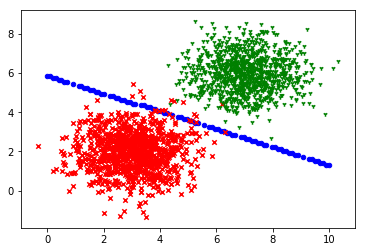

In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

learning_rate = 0.1
training_epochs = 2000

def sigmoid(x):
    return 1./(1. + np.exp(-x))

# x1은 x축(위도), x2는 y축(경도). (3,2)를 중심으로 label1(Y=0), (7, 6)을 중심으로 label2(Y=1)
x1_label1 = np.random.normal(3, 1, 1000)
x2_label1 = np.random.normal(2, 1, 1000)
x1_label2 = np.random.normal(7, 1, 1000)
x2_label2 = np.random.normal(6, 1, 1000)
# append할 때 순서 중요!
x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)
ys = np.asarray([0.]*len(x1_label1) + [1.]*len(x1_label2))

X1 = tf.placeholder(tf.float32, shape=(None,), name = "x1")
X2 = tf.placeholder(tf.float32, shape=(None,), name = "x2")
Y = tf.placeholder(tf.float32, shape=(None,), name = "y")
w = tf.Variable([0., 0., 0.], name="w", trainable=True)

y_model = tf.sigmoid(w[2]*X2+w[1]*X1+w[0])
# 책에 오타... log를 각각 붙여야 함.
cost = tf.reduce_mean(-Y*tf.log(y_model) - (1-Y)*tf.log(1-y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs) :
        err, _ = sess.run([cost, train_op], {X1:x1s, X2:x2s, Y:ys})
        print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X1:x1s, X2:x2s, Y:ys})
    
x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        # 책 오타... -없이 해야함
        z = sigmoid(x2_test*w_val[2]+x1_test*w_val[1]+w_val[0])
        # 찾은 w_val값을 넣었을 때 sigmoid 값이 0.5인 곳의 위도, 경도를 찾아내기 위함.
        if abs(z-0.5) < 0.01 :
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)
            
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)

plt.show()

### Listing 4.8

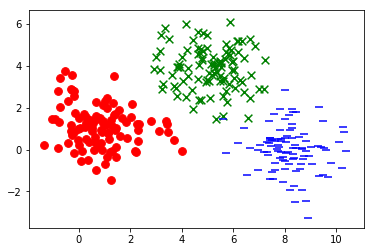

In [26]:
import numpy as np
import matplotlib.pyplot as plt  
 
x1_label0 = np.random.normal(1, 1, (100, 1))
x2_label0 = np.random.normal(1, 1, (100, 1))
x1_label1 = np.random.normal(5, 1, (100, 1))
x2_label1 = np.random.normal(4, 1, (100, 1))
x1_label2 = np.random.normal(8, 1, (100, 1))
x2_label2 = np.random.normal(0, 1, (100, 1))

plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)

plt.show()

In [27]:
# 중요하게 짚고 넘어가야할 부분 같아서 Clip
# EXERCISE 4.4 One-hot encoding might appear like an unnecessary step.
# Why not just have a 1- dimensional output where values of 1, 2, and 3 represent the three classes.

# ANSWER Regression may induce a semantic structure in the output.
# If outputs are similar, regression implies that their inputs were also similar.
# If we use just one dimension, then we’re implying labels 2 and 3 are more similar to each other than 1 and 3.
# We must be careful about making unnecessary or incorrect assumptions, so it’s a safe bet to use one-hot encoding.


### Listing 4.9

In [28]:
# label이 같은 것끼리 짝지어주기.
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))
# label끼리 서로 구분해서 하나의 matrix로 만들어주기.
xs = np.vstack((xs_label0, xs_label1, xs_label2))

labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))

arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]  
 
test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))
test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2))
test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0., 1.]] * 10)

train_size, num_features = xs.shape  

### Listing 4.10

In [33]:
import tensorflow as tf

learning_rate = 0.01
training_epochs = 1000

num_labels = 3
batch_size = 100

X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])

W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b)

# 오타... -에 대해서 괄호로 묶어줘야 함.
cost = -(tf.reduce_sum(Y * tf.log(y_model)))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

### Listing 4.11

In [34]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for step in range(training_epochs * train_size // batch_size):
        offset = (step * batch_size) % train_size
        batch_xs = xs[offset:(offset + batch_size), :]
        batch_labels = labels[offset:(offset + batch_size)]

        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
        print (step, err)

        W_val = sess.run(W)
        print('w', W_val)

        b_val = sess.run(b)
        print('b', b_val)
        print("accuracy", accuracy.eval(feed_dict={X: test_xs, Y: test_labels}))

0 109.8612
w [[-1.2322536   0.152223    1.0800307 ]
 [-0.20001759  0.76934606 -0.5693285 ]]
b [ 0.01666667 -0.00333332 -0.01333333]
accuracy 0.53333336
1 115.72221
w [[-0.9715711   0.7766103   0.19496095]
 [ 0.1114694   0.9744352  -1.0859046 ]]
b [ 0.2623064  -0.0217653  -0.24054109]
accuracy 0.33333334
2 272.36707
w [[-0.6667615  -2.1108472   2.7776098 ]
 [ 0.43660152  0.55297023 -0.98957175]]
b [ 0.56700456 -0.5982439   0.03123935]
accuracy 0.43333334
3 715.6568
w [[-0.4052947  -0.42839217  0.8336878 ]
 [ 0.63608706  1.8001261  -2.4362135 ]]
b [ 0.80272216 -0.31856945 -0.48415267]
accuracy 0.7
4 39.064583
w [[-0.34021446 -0.38628474  0.72650015]
 [ 0.8244427   1.6264191  -2.4508622 ]]
b [ 0.9652817  -0.44365126 -0.52163047]
accuracy 0.8
5 37.222626
w [[-0.6777369  -0.09401315  0.77175105]
 [ 0.75340545  1.6752968  -2.4287026 ]]
b [ 1.0489055  -0.48951653 -0.559389  ]
accuracy 0.6666667
6 49.20966
w [[-0.47954306 -0.4356324   0.9151765 ]
 [ 0.9674037   1.3779504  -2.3453546 ]]
b [ 1.2

accuracy 1.0
93 6.751129
w [[-1.0044543  -0.05332395  1.0577805 ]
 [ 0.16205972  1.5649692  -1.7270294 ]]
b [ 4.1579356 -2.0696287 -2.0883064]
accuracy 1.0
94 9.890343
w [[-0.9961948   0.08268776  0.91350937]
 [ 0.14063339  1.6176022  -1.7582362 ]]
b [ 4.1704035 -2.050866  -2.1195374]
accuracy 0.96666664
95 7.3074217
w [[-0.9807907  -0.04175036  1.0225433 ]
 [ 0.17709967  1.5609622  -1.7380624 ]]
b [ 4.192592  -2.081751  -2.1108406]
accuracy 1.0
96 6.6317754
w [[-1.0101784  -0.05132129  1.061502  ]
 [ 0.15252502  1.5672642  -1.7197897 ]]
b [ 4.200445  -2.0857446 -2.1147003]
accuracy 1.0
97 9.807262
w [[-1.0019742   0.08488891  0.9170875 ]
 [ 0.131042    1.620092   -1.7511346 ]]
b [ 4.2126284 -2.0667365 -2.1458917]
accuracy 0.96666664
98 7.220831
w [[-0.986896   -0.03836327  1.0252615 ]
 [ 0.16713835  1.5640755  -1.7312144 ]]
b [ 4.2343416 -2.097171  -2.1371703]
accuracy 1.0
99 6.520478
w [[-1.0158054  -0.04940346  1.065211  ]
 [ 0.1434137   1.5696603  -1.7130746 ]]
b [ 4.241861  -2.101

w [[-1.1394024   0.03321353  1.1061921 ]
 [-0.02304148  1.6627554  -1.6397145 ]]
b [ 5.217626  -2.4072063 -2.8104203]
accuracy 0.96666664
195 4.8810024
w [[-1.1597488  -0.01141298  1.1711651 ]
 [-0.03472551  1.6538813  -1.6191564 ]]
b [ 5.220414  -2.4145632 -2.8058515]
accuracy 1.0
196 8.029106
w [[-1.1531096   0.12157802  1.0315349 ]
 [-0.05554216  1.7065241  -1.6509826 ]]
b [ 5.22768   -2.3928254 -2.8348553]
accuracy 0.96666664
197 5.550277
w [[-1.143266    0.0347547   1.1085147 ]
 [-0.02695258  1.6653292  -1.6383773 ]]
b [ 5.241474  -2.4133425 -2.8281322]
accuracy 0.96666664
198 4.857082
w [[-1.1634508  -0.01059562  1.1740499 ]
 [-0.03847556  1.6561756  -1.6177007 ]]
b [ 5.2441983 -2.4207757 -2.8234231]
accuracy 1.0
199 7.9911284
w [[-1.156863    0.12218808  1.0346783 ]
 [-0.05924716  1.7087388  -1.6494923 ]]
b [ 5.2513795 -2.3990269 -2.8523533]
accuracy 0.96666664
200 5.519439
w [[-1.1470917   0.03626988  1.1108254 ]
 [-0.03079929  1.6678665  -1.6370678 ]]
b [ 5.265049  -2.4193404 

290 4.8268356
w [[-1.2480824   0.07270902  1.1753775 ]
 [-0.12478885  1.7291193  -1.60433   ]]
b [ 5.8740354 -2.5503986 -3.3236377]
accuracy 0.96666664
291 4.3644867
w [[-1.2643912   0.01047592  1.2539194 ]
 [-0.13318864  1.7137748  -1.5805857 ]]
b [ 5.875544  -2.5596309 -3.315914 ]
accuracy 1.0
292 7.0285807
w [[-1.259515    0.13657162  1.1229477 ]
 [-0.15254302  1.7636361  -1.6110927 ]]
b [ 5.880746  -2.538095  -3.3426516]
accuracy 0.96666664
293 4.809348
w [[-1.2510858   0.0736981   1.1773919 ]
 [-0.12739396  1.7307447  -1.6033504 ]]
b [ 5.89176   -2.5535195 -3.3382413]
accuracy 0.96666664
294 4.353711
w [[-1.267294    0.01105387  1.2562444 ]
 [-0.13573009  1.7152573  -1.5795269 ]]
b [ 5.893245 -2.562796 -3.33045 ]
accuracy 1.0
295 7.002886
w [[-1.2624754   0.13693643  1.1255431 ]
 [-0.15504056  1.7650312  -1.6099904 ]]
b [ 5.8983974 -2.5412774 -3.3571208]
accuracy 0.96666664
296 4.792124
w [[-1.2540704   0.07467584  1.1793988 ]
 [-0.12997293  1.7323481  -1.6023749 ]]
b [ 5.909352  

b [ 6.341552  -2.6196766 -3.7218769]
accuracy 0.96666664
378 4.1162376
w [[-1.3423716   0.02549078  1.3168848 ]
 [-0.1981949   1.7499918  -1.5517964 ]]
b [ 6.3425913 -2.629983  -3.7126102]
accuracy 1.0
379 6.3758454
w [[-1.3391453   0.14562757  1.1935216 ]
 [-0.21635562  1.7974219  -1.5810659 ]]
b [ 6.346562  -2.6090539 -3.7375097]
accuracy 0.96666664
380 4.3944182
w [[-1.3311974   0.09831414  1.2328871 ]
 [-0.19320953  1.7697923  -1.5765824 ]]
b [ 6.3561974 -2.6214137 -3.7347853]
accuracy 0.96666664
381 4.1094847
w [[-1.3448634   0.02595219  1.318915  ]
 [-0.20015842  1.7510303  -1.5508716 ]]
b [ 6.3572264 -2.6317508 -3.7254775]
accuracy 1.0
382 6.3562584
w [[-1.3416926   0.14589201  1.1958042 ]
 [-0.21828099  1.7983809  -1.5800996 ]]
b [ 6.3611608 -2.6108453 -3.7503173]
accuracy 0.96666664
383 4.382627
w [[-1.3337553   0.09904633  1.2347126 ]
 [-0.19519345  1.770909   -1.5757153 ]]
b [ 6.370759  -2.6231153 -3.7476454]
accuracy 0.96666664
384 4.102823
w [[-1.3473439   0.02641026  1.32

 [-0.24475454  1.7978193  -1.5530653 ]]
b [ 6.7483516 -2.6584609 -4.089895 ]
accuracy 0.96666664
468 3.9456902
w [[-1.4127396   0.0380277   1.3747154 ]
 [-0.25082564  1.7768763  -1.5260513 ]]
b [ 6.7491736 -2.6695604 -4.079617 ]
accuracy 1.0
469 5.8518972
w [[-1.4110955   0.15248314  1.2586159 ]
 [-0.26792264  1.8220311  -1.5541091 ]]
b [ 6.7521915 -2.6493702 -4.102825 ]
accuracy 0.96666664
470 4.089889
w [[-1.4033812   0.11776614  1.2856185 ]
 [-0.24633409  1.7986499  -1.5523164 ]]
b [ 6.760884  -2.6593502 -4.1015377]
accuracy 0.96666664
471 3.9409266
w [[-1.4149461   0.03840335  1.3765461 ]
 [-0.25238016  1.7776446  -1.5252651 ]]
b [ 6.761701  -2.6704724 -4.0912333]
accuracy 1.0
472 5.836423
w [[-1.4133514   0.15267697  1.2606779 ]
 [-0.2694444   1.8227274  -1.5532837 ]]
b [ 6.7646914 -2.6503074 -4.1143885]
accuracy 0.96666664
473 4.081212
w [[-1.4056427   0.1183355   1.2873107 ]
 [-0.24790187  1.799473   -1.5515718 ]]
b [ 6.7733574 -2.6602175 -4.1131444]
accuracy 0.96666664
474 3.93

accuracy 0.96666664
552 3.8275058
w [[-1.4717267   0.04767391  1.4240562 ]
 [-0.29038173  1.7961447  -1.5057638 ]]
b [ 7.0797644 -2.6877391 -4.392027 ]
accuracy 1.0
553 5.457024
w [[-1.4713836   0.15720242  1.3141844 ]
 [-0.30662057  1.8393672  -1.5327474 ]]
b [ 7.082085  -2.6682646 -4.413822 ]
accuracy 0.96666664
554 3.8734198
w [[-1.4638005   0.13215956  1.3316442 ]
 [-0.28621528  1.8192593  -1.5330448 ]]
b [ 7.0901318 -2.6764653 -4.413668 ]
accuracy 0.96666664
555 3.8237796
w [[-1.4737347   0.04798744  1.4257505 ]
 [-0.29165575  1.7967587  -1.5051036 ]]
b [ 7.090865  -2.6881425 -4.4027243]
accuracy 1.0
556 5.444248
w [[-1.4734347  0.1573458  1.316092 ]
 [-0.307866   1.839915  -1.5320498]]
b [ 7.093164  -2.6686938 -4.424472 ]
accuracy 0.96666664
557 3.8665807
w [[-1.4658556   0.13261943  1.3332393 ]
 [-0.28749946  1.8199146  -1.5324159 ]]
b [ 7.1011906 -2.6768367 -4.4243555]
accuracy 0.96666664
558 3.8200808
w [[-1.4757365   0.04829898  1.4274406 ]
 [-0.29292116  1.7973683  -1.504447

accuracy 0.96666664
644 3.6892283
w [[-1.5228096   0.14460465  1.378208  ]
 [-0.321273    1.837109   -1.5158371 ]]
b [ 7.4043155 -2.6821525 -4.722163 ]
accuracy 0.96666664
645 3.7232962
w [[-1.5312675   0.05654392  1.4747268 ]
 [-0.32621053  1.8134171  -1.4872077 ]]
b [ 7.405021 -2.694291 -4.71073 ]
accuracy 1.0
646 5.0956116
w [[-1.5321589   0.16096807  1.371194  ]
 [-0.3416231   1.8546768  -1.5130548 ]]
b [ 7.406724  -2.6756067 -4.7311172]
accuracy 0.96666664
647 3.6837537
w [[-1.5246886   0.14497536  1.3797165 ]
 [-0.32232937  1.837648   -1.5153198 ]]
b [ 7.414213  -2.6821728 -4.7320404]
accuracy 0.96666664
648 3.7202678
w [[-1.5331014   0.05680307  1.4763017 ]
 [-0.327252    1.813922   -1.4866712 ]]
b [ 7.4149184 -2.694325  -4.7205935]
accuracy 1.0
649 5.0850296
w [[-1.5340292   0.16106802  1.3729645 ]
 [-0.3426398   1.8551211  -1.5124825 ]]
b [ 7.4166036 -2.6756659 -4.7409377]
accuracy 0.96666664
650 3.6783185
w [[-1.5265625   0.14534344  1.3812222 ]
 [-0.3233792   1.8381839  -1.5

w [[-1.5876079   0.06411946  1.523492  ]
 [-0.3566297   1.828357   -1.471729  ]]
b [ 7.70612   -2.6912417 -5.0148816]
accuracy 1.0
742 4.7845464
w [[-1.5895667   0.16360666  1.4259636 ]
 [-0.3713001   1.8677531  -1.4964547 ]]
b [ 7.707311  -2.6733541 -5.0339603]
accuracy 0.96666664
743 3.5267534
w [[-1.5822036   0.15557417  1.426633  ]
 [-0.35299665  1.8534516  -1.5004566 ]]
b [ 7.714337  -2.678501  -5.0358396]
accuracy 0.96666664
744 3.631134
w [[-1.5892951   0.0643342   1.5249646 ]
 [-0.35749254  1.8287885  -1.4712975 ]]
b [ 7.7150493 -2.6910274 -5.0240254]
accuracy 1.0
745 4.7756615
w [[-1.5912843   0.16367213  1.4276158 ]
 [-0.37214133  1.8681288  -1.495989  ]]
b [ 7.716226  -2.6731641 -5.0430655]
accuracy 0.96666664
746 3.5223556
w [[-1.5839244   0.15586935  1.4280587 ]
 [-0.35386673  1.8539063  -1.500041  ]]
b [ 7.723239  -2.67827   -5.0449724]
accuracy 0.96666664
747 3.628558
w [[-1.5909783   0.06454771  1.5264342 ]
 [-0.35835063  1.8292181  -1.470869  ]]
b [ 7.723952  -2.690806

accuracy 1.0
829 4.544304
w [[-1.6376932   0.16515163  1.4725454 ]
 [-0.39393488  1.8780179  -1.4840847 ]]
b [ 7.9556327 -2.6656084 -5.2900286]
accuracy 0.96666664
830 3.409628
w [[-1.6304266   0.16337822  1.4670522 ]
 [-0.3764231   1.8658769  -1.4894555 ]]
b [ 7.962307  -2.6696482 -5.292663 ]
accuracy 0.96666664
831 3.5602725
w [[-1.6364979   0.07006126  1.5664403 ]
 [-0.3805978   1.8405734  -1.4599773 ]]
b [ 7.963042  -2.6824348 -5.2806115]
accuracy 1.0
832 4.5366178
w [[-1.6392937   0.1651929   1.4741044 ]
 [-0.39465564  1.8783512  -1.4836972 ]]
b [ 7.9638414 -2.665269  -5.298577 ]
accuracy 0.96666664
833 3.4059424
w [[-1.6320305   0.16362129  1.4684128 ]
 [-0.37716964  1.8662801  -1.4891121 ]]
b [ 7.9705043 -2.669273  -5.3012357]
accuracy 0.96666664
834 3.5579531
w [[-1.638069    0.07024265  1.56783   ]
 [-0.3813342   1.8409574  -1.4596249 ]]
b [ 7.97124   -2.6820672 -5.2891774]
accuracy 1.0
835 4.528968
w [[-1.6408902   0.16523334  1.4756606 ]
 [-0.3953728   1.8786832  -1.483312  

accuracy 0.96666664
890 3.339858
w [[-1.6618103   0.16794948  1.4938653 ]
 [-0.3906816   1.8736721  -1.4829926 ]]
b [ 8.122218  -2.6614366 -5.460787 ]
accuracy 0.96666664
891 3.5152106
w [[-1.6672599  0.07351    1.5937544]
 [-0.3946624  1.8480169 -1.4533566]]
b [ 8.122973  -2.6743665 -5.4486117]
accuracy 1.0
892 4.39028
w [[-1.6705384   0.16587311  1.5046698 ]
 [-0.40834948  1.8847774  -1.47643   ]]
b [ 8.123549  -2.6576664 -5.465888 ]
accuracy 0.96666664
893 3.3365772
w [[-1.6633426   0.16816276  1.4951842 ]
 [-0.39135945  1.874048   -1.4826907 ]]
b [ 8.13      -2.6609905 -5.469014 ]
accuracy 0.96666664
894 3.5130255
w [[-1.6687628   0.07367294  1.5950942 ]
 [-0.39533108  1.8483769  -1.4530479 ]]
b [ 8.130756  -2.6739268 -5.456834 ]
accuracy 1.0
895 4.383313
w [[-1.672064    0.16590035  1.506168  ]
 [-0.4090003   1.8850877  -1.4760895 ]]
b [ 8.131322  -2.6572497 -5.4740763]
accuracy 0.96666664
896 3.3333125
w [[-1.6648715   0.16837463  1.4965012 ]
 [-0.39203414  1.8744227  -1.4823906 

 [-0.42259404  1.8916881  -1.4690962 ]]
b [ 8.297566  -2.6473675 -5.6502056]
accuracy 0.96666664
962 3.2659268
w [[-1.6976748   0.17270382  1.5249755 ]
 [-0.40613273  1.8823781  -1.4762474 ]]
b [ 8.303795  -2.6499777 -5.6538243]
accuracy 0.96666664
963 3.4641876
w [[-1.7024547   0.07719211  1.6252671 ]
 [-0.4099048   1.8563794  -1.4464767 ]]
b [ 8.304576  -2.6630473 -5.641536 ]
accuracy 1.0
964 4.231446
w [[-1.7062438   0.16636693  1.5398815 ]
 [-0.42318115  1.8919786  -1.4687996 ]]
b [ 8.304916  -2.6468892 -5.658035 ]
accuracy 0.96666664
965 3.2630534
w [[-1.6991293   0.17288634  1.5262476 ]
 [-0.4067419   1.8827275  -1.4759878 ]]
b [ 8.311136  -2.6494699 -5.6616735]
accuracy 0.96666664
966 3.4621215
w [[-1.7038829   0.07733582  1.6265517 ]
 [-0.4105058   1.8567162  -1.4462125 ]]
b [ 8.311919  -2.6625445 -5.649381 ]
accuracy 1.0
967 4.225185
w [[-1.7076919   0.1663808   1.5413157 ]
 [-0.42376578  1.8922683  -1.4685047 ]]
b [ 8.312251  -2.6464086 -5.6658487]
accuracy 0.96666664
968 3.2

accuracy 0.96666664
1032 3.4177382
w [[-1.734586    0.08031908  1.6542721 ]
 [-0.42311996  1.8639234  -1.4408051 ]]
b [ 8.469296  -2.6509938 -5.818309 ]
accuracy 1.0
1033 4.094037
w [[-1.7388033   0.1665684   1.5722401 ]
 [-0.43603358  1.8984659  -1.4624339 ]]
b [ 8.4694395 -2.6353374 -5.834109 ]
accuracy 0.96666664
1034 3.2010446
w [[-1.7317674   0.1767788   1.5549939 ]
 [-0.42008212  1.8905131  -1.4704325 ]]
b [ 8.475459  -2.6372705 -5.838196 ]
accuracy 0.96666664
1035 3.4157667
w [[-1.73595     0.08044701  1.6555082 ]
 [-0.4236674   1.8642424  -1.4405766 ]]
b [ 8.476268  -2.6504493 -5.8258257]
accuracy 1.0
1036 4.0883613
w [[-1.7401847   0.16657197  1.5736179 ]
 [-0.43656585  1.8987402  -1.4621758 ]]
b [ 8.476403  -2.6348143 -5.841596 ]
accuracy 0.96666664
1037 3.1985164
w [[-1.7331522   0.1769355   1.556222  ]
 [-0.42063478  1.8908414  -1.4702082 ]]
b [ 8.482415  -2.6367204 -5.8457017]
accuracy 0.96666664
1038 3.413795
w [[-1.7373112   0.08057426  1.6567422 ]
 [-0.42421272  1.86456

1100 3.1483347
w [[-1.7616088   0.18000613  1.5816082 ]
 [-0.43177363  1.8975633  -1.4657915 ]]
b [ 8.625114  -2.6248763 -6.000244 ]
accuracy 0.96666664
1101 3.373203
w [[-1.7652992   0.08310819  1.6821966 ]
 [-0.43520394  1.8710957  -1.4358934 ]]
b [ 8.625948  -2.6381323 -5.9878216]
accuracy 1.0
1102 3.9691648
w [[-1.7698926   0.16655287  1.6033453 ]
 [-0.44778138  1.9046324  -1.4568528 ]]
b [ 8.625917  -2.62296   -6.0029635]
accuracy 0.96666664
1103 3.1460776
w [[-1.7629352   0.18014257  1.5827981 ]
 [-0.432283    1.8978757  -1.4655944 ]]
b [ 8.631755  -2.6243002 -6.0074606]
accuracy 0.96666664
1104 3.3713074
w [[-1.7666043   0.08322244  1.6833874 ]
 [-0.43570662  1.8714     -1.4356952 ]]
b [ 8.632589  -2.6375594 -5.995036 ]
accuracy 1.0
1105 3.9639962
w [[-1.7712129   0.16654795  1.6046705 ]
 [-0.44827002  1.9048942  -1.456626  ]]
b [ 8.632552  -2.6224077 -6.0101504]
accuracy 0.96666664
1106 3.1438303
w [[-1.7642589   0.18027794  1.5839865 ]
 [-0.43279064  1.8981873  -1.4653986 ]]
b

1194 3.3156366
w [[-1.8046647   0.08641288  1.7182574 ]
 [-0.45001885  1.8802891  -1.4302716 ]]
b [ 8.82582   -2.6200032 -6.2058234]
accuracy 1.0
1195 3.8179312
w [[-1.8096943   0.16625783  1.643442  ]
 [-0.46218008  1.912545   -1.4503663 ]]
b [ 8.825587  -2.6054564 -6.2201376]
accuracy 0.96666664
1196 3.081416
w [[-1.8028419   0.18397155  1.618876  ]
 [-0.4472439   1.9072585  -1.460016  ]]
b [ 8.8312025 -2.606073  -6.225136 ]
accuracy 0.96666664
1197 3.313819
w [[-1.8058984   0.08651178  1.7193922 ]
 [-0.45047227  1.8805779  -1.430107  ]]
b [ 8.83207   -2.6194086 -6.212668 ]
accuracy 1.0
1198 3.8133478
w [[-1.8109409   0.16624391  1.6447024 ]
 [-0.4626207   1.9127938  -1.4501745 ]]
b [ 8.831831  -2.6048813 -6.2269564]
accuracy 0.96666664
1199 3.0794888
w [[-1.8040918   0.18408313  1.6200142 ]
 [-0.4477018   1.9075522  -1.4598519 ]]
b [ 8.83744  -2.605476 -6.23197 ]
accuracy 0.96666664
1200 3.3120065
w [[-1.8071299   0.08661015  1.7205253 ]
 [-0.45092425  1.8808662  -1.4299433 ]]
b [ 8

w [[-1.8429451   0.1873118   1.6556385 ]
 [-0.46165204  1.916703   -1.455053  ]]
b [ 9.031107  -2.5862298 -6.444895 ]
accuracy 0.96666664
1296 3.255179
w [[-1.8454345   0.08953585  1.7559038 ]
 [-0.4646965   1.8898767  -1.4251823 ]]
b [ 9.032007 -2.599614 -6.432411]
accuracy 1.0
1297 3.671256
w [[-1.8508638   0.16565615  1.6852129 ]
 [-0.47644332  1.9208177  -1.4443765 ]]
b [ 9.031586 -2.585718 -6.445886]
accuracy 0.96666664
1298 3.0208757
w [[-1.8441248   0.18740278  1.6567273 ]
 [-0.46206766  1.9169817  -1.4549161 ]]
b [ 9.036983  -2.5856261 -6.4513745]
accuracy 0.96666664
1299 3.2534385
w [[-1.8465984   0.08962082  1.7569828 ]
 [-0.46510687  1.8901521  -1.4250473 ]]
b [ 9.037884  -2.5990114 -6.438891 ]
accuracy 1.0
1300 3.667213
w [[-1.8520384   0.16563499  1.6864086 ]
 [-0.47684214  1.9210558  -1.4442157 ]]
b [ 9.037457 -2.585134 -6.452342]
accuracy 0.96666664
1301 3.0192385
w [[-1.8453027   0.18749319  1.6578147 ]
 [-0.46248218  1.9172602  -1.45478   ]]
b [ 9.042848  -2.5850224 -6

w [[-1.8886117   0.16486898  1.7237488 ]
 [-0.4890699   1.9285414  -1.439473  ]]
b [ 9.220211  -2.5664525 -6.6537824]
accuracy 0.96666664
1397 2.9706671
w [[-1.8819803   0.19011071  1.6918757 ]
 [-0.47518966  1.9259737  -1.4507855 ]]
b [ 9.225417  -2.5657454 -6.6596956]
accuracy 0.96666664
1398 3.197104
w [[-1.8839632   0.09222953  1.7917398 ]
 [-0.47806627  1.8990598  -1.420995  ]]
b [ 9.226348  -2.5791507 -6.6472216]
accuracy 1.0
1399 3.541498
w [[-1.8897241  0.1648426  1.7248877]
 [-0.4894365  1.9287715 -1.4393365]]
b [ 9.225768  -2.5658705 -6.659921 ]
accuracy 0.96666664
1400 2.9692612
w [[-1.883096    0.19018453  1.6929177 ]
 [-0.4755706   1.9262402  -1.4506712 ]]
b [ 9.230968  -2.5651457 -6.665847 ]
accuracy 0.96666664
1401 3.1954274
w [[-1.8850651   0.09230313  1.7927681 ]
 [-0.47844255  1.8993245  -1.4208835 ]]
b [ 9.2319    -2.5785513 -6.6533732]
accuracy 1.0
1402 3.53791
w [[-1.8908348   0.16481619  1.7260249 ]
 [-0.48980224  1.9290013  -1.4392006 ]]
b [ 9.231316  -2.5652888 

w [[-1.9183935   0.09444193  1.823959  ]
 [-0.48969004  1.9074081  -1.4177192 ]]
b [ 9.399762  -2.5601158 -6.8396697]
accuracy 1.0
1495 3.4324968
w [[-1.9244148   0.16393866  1.7604835 ]
 [-0.50073564  1.9360341  -1.4352996 ]]
b [ 9.399054 -2.547385 -6.851692]
accuracy 0.96666664
1496 2.9274337
w [[-1.917888    0.19232178  1.7255737 ]
 [-0.48730892  1.934616   -1.4473083 ]]
b [ 9.404087  -2.5461233 -6.8579874]
accuracy 0.96666664
1497 3.1427574
w [[-1.9194428   0.09450661  1.8249435 ]
 [-0.49004024  1.9076649  -1.4176259 ]]
b [ 9.405045 -2.559527 -6.845541]
accuracy 1.0
1498 3.4292767
w [[-1.9254714   0.16390873  1.7615701 ]
 [-0.5010761   1.9362581  -1.4351832 ]]
b [ 9.404333  -2.5468128 -6.8575435]
accuracy 0.96666664
1499 2.9262176
w [[-1.9189479   0.19238198  1.7265733 ]
 [-0.48766255  1.9348731  -1.4472117 ]]
b [ 9.409362  -2.545535  -6.8638496]
accuracy 0.96666664
1500 3.141139
w [[-1.9204906   0.09457115  1.8259269 ]
 [-0.49038973  1.9079217  -1.417533  ]]
b [ 9.41032   -2.55893

 [-0.49827665  1.9427247  -1.4444487 ]]
b [ 9.569066  -2.5275319 -7.0415583]
accuracy 0.96666664
1593 3.0918076
w [[-1.9522239   0.09645128  1.8557801 ]
 [-0.5008813   1.9157737  -1.414893  ]]
b [ 9.570045  -2.5409167 -7.029153 ]
accuracy 1.0
1594 3.3315215
w [[-1.9584695   0.1629084   1.7955686 ]
 [-0.51161844  1.943346   -1.4317282 ]]
b [ 9.569223 -2.528723 -7.040525]
accuracy 0.96666664
1595 2.8900218
w [[-1.9520444   0.19412701  1.7579248 ]
 [-0.4986085   1.9429743  -1.4443665 ]]
b [ 9.5741    -2.5269592 -7.047165 ]
accuracy 0.96666664
1596 3.0902443
w [[-1.9532242   0.09650838  1.8567233 ]
 [-0.5012094   1.9160239  -1.4148151 ]]
b [ 9.57508   -2.5403433 -7.034761 ]
accuracy 1.0
1597 3.3286252
w [[-1.959476    0.16287601  1.7966075 ]
 [-0.5119375   1.9435652  -1.4316283 ]]
b [ 9.574255  -2.5281656 -7.046114 ]
accuracy 0.96666664
1598 2.888968
w [[-1.9530538   0.19417618  1.7588853 ]
 [-0.4989397   1.9432238  -1.4442847 ]]
b [ 9.579126  -2.5263875 -7.052764 ]
accuracy 0.96666664
159

1692 3.0409732
w [[-1.9845121   0.09823094  1.8862883 ]
 [-0.5114047   1.9239336  -1.4125297 ]]
b [ 9.732566  -2.5222924 -7.210297 ]
accuracy 1.0
1693 3.2405882
w [[-1.9909444   0.16181293  1.8291385 ]
 [-0.52185684  1.9505136  -1.4286575 ]]
b [ 9.731647  -2.5106082 -7.221062 ]
accuracy 0.96666664
1694 2.8575058
w [[-1.9846175   0.19560117  1.7890233 ]
 [-0.50923127  1.951098   -1.4418675 ]]
b [ 9.736379  -2.5083878 -7.2280145]
accuracy 0.96666664
1695 3.0394611
w [[-1.985468    0.09828168  1.8871933 ]
 [-0.51171446  1.924178   -1.4124644 ]]
b [ 9.737378 -2.521738 -7.215664]
accuracy 1.0
1696 3.2379756
w [[-1.9919055   0.16177899  1.8301334 ]
 [-0.5221583   1.9507289  -1.4285713 ]]
b [ 9.736456 -2.510069 -7.226411]
accuracy 0.96666664
1697 2.856588
w [[-1.9855814   0.19564132  1.789947  ]
 [-0.5095439   1.9513409  -1.4417977 ]]
b [ 9.741183  -2.5078354 -7.233372 ]
accuracy 0.96666664
1698 3.0379462
w [[-1.9864227   0.09833225  1.8880973 ]
 [-0.5120237   1.9244224  -1.4123994 ]]
b [ 9.7

b [ 9.887098  -2.493133  -7.3939867]
accuracy 0.96666664
1793 2.8291314
w [[-2.0157526   0.19680502  1.8189548 ]
 [-0.51928824  1.9590244  -1.439737  ]]
b [ 9.891697  -2.4904962 -7.4012227]
accuracy 0.96666664
1794 2.9903288
w [[-2.016313    0.09986518  1.9164551 ]
 [-0.52166474  1.9321591  -1.4104952 ]]
b [ 9.892714 -2.503801 -7.388934]
accuracy 1.0
1795 3.1560192
w [[-2.0229042   0.16064467  1.8622669 ]
 [-0.5318449   1.9577755  -1.4259315 ]]
b [ 9.891707  -2.4926143 -7.3991146]
accuracy 0.96666664
1796 2.8283286
w [[-2.0166748   0.19683783  1.8198445 ]
 [-0.5195852   1.9592617  -1.4396775 ]]
b [ 9.896302  -2.4899652 -7.4063587]
accuracy 0.96666664
1797 2.9888635
w [[-2.017227    0.09991061  1.917324  ]
 [-0.5219586   1.9323983  -1.4104408 ]]
b [ 9.897319  -2.5032685 -7.394072 ]
accuracy 1.0
1798 3.1536598
w [[-2.0238223   0.16060998  1.86322   ]
 [-0.5321311   1.9579873  -1.4258573 ]]
b [ 9.89631  -2.492096 -7.404236]
accuracy 0.96666664
1799 2.8275292
w [[-2.0175958   0.19687045  1

 [-0.5285825  1.966547  -1.4379665]]
b [10.036282  -2.473844  -7.5624604]
accuracy 0.96666664
1890 2.9442108
w [[-2.0450015   0.10124898  1.9437609 ]
 [-0.5308647   1.9397532  -1.4088904 ]]
b [10.037312  -2.4870963 -7.550238 ]
accuracy 1.0
1891 3.0838165
w [[-2.051716    0.15952837  1.892196  ]
 [-0.5408067   1.9645128  -1.4237081 ]]
b [10.036235  -2.4763541 -7.5599036]
accuracy 0.96666664
1892 2.8042736
w [[-2.0455754   0.19778746  1.8477964 ]
 [-0.5288664   1.9667798  -1.4379153 ]]
b [10.04071   -2.4733353 -7.5673985]
accuracy 0.96666664
1893 2.9427936
w [[-2.0458796  0.1012901  1.9445982]
 [-0.5311458  1.9399884 -1.4088445]]
b [10.04174   -2.4865856 -7.555178 ]
accuracy 1.0
1894 3.081667
w [[-2.0525975   0.15949345  1.8931129 ]
 [-0.5410806   1.964722   -1.4236434 ]]
b [10.040662 -2.475857 -7.564828]
accuracy 0.96666664
1895 2.8035696
w [[-2.0464597   0.19781429  1.8486542 ]
 [-0.52914995  1.9670124  -1.4378644 ]]
b [10.045135  -2.4728272 -7.5723305]
accuracy 0.96666664
1896 2.94137

b [10.172226  -2.4715893 -7.700664 ]
accuracy 1.0
1984 3.019891
w [[-2.0785532   0.15844618  1.9201173 ]
 [-0.5491418   1.9709624  -1.4218225 ]]
b [10.171089  -2.4612572 -7.7098594]
accuracy 0.96666664
1985 2.783666
w [[-2.0724957  0.1985452  1.8739606]
 [-0.5374904  1.9739298 -1.4364412]]
b [10.175458  -2.4579077 -7.7175775]
accuracy 0.96666664
1986 2.899547
w [[-2.0725863   0.10250787  1.9700885 ]
 [-0.5396864   1.9472218  -1.4075372 ]]
b [10.176498  -2.4711003 -7.7054257]
accuracy 1.0
1987 3.017919
w [[-2.0794024   0.15841138  1.9210012 ]
 [-0.5494056   1.9711694  -1.4217656 ]]
b [10.17536   -2.460781  -7.7146063]
accuracy 0.96666664
1988 2.7830405
w [[-2.0733476   0.19856726  1.8747903 ]
 [-0.5377632   1.9741584  -1.436397  ]]
b [10.179725  -2.4574215 -7.722331 ]
accuracy 0.96666664
1989 2.898173
w [[-2.0734317   0.10254542  1.9708961 ]
 [-0.5399565   1.9474533  -1.4074985 ]]
b [10.180766  -2.4706123 -7.710181 ]
accuracy 1.0
1990 3.015953
w [[-2.0802507   0.1583766   1.921884  ]
 [

2062 2.9703562
w [[-2.1003084   0.15754586  1.9427731 ]
 [-0.5559041   1.9763192  -1.4204173 ]]
b [10.280589 -2.449102 -7.831513]
accuracy 0.96666664
2063 2.7681623
w [[-2.0943182   0.19907814  1.8952507 ]
 [-0.54448086  1.9798355  -1.4353569 ]]
b [10.284873  -2.4454942 -7.8394046]
accuracy 0.96666664
2064 2.8642933
w [[-2.094247    0.10345271  1.990805  ]
 [-0.5466119   1.953206   -1.4065963 ]]
b [10.285921  -2.4586344 -7.8273125]
accuracy 1.0
2065 2.9685206
w [[-2.101132    0.15751147  1.9436312 ]
 [-0.5561604   1.9765244  -1.4203663 ]]
b [10.284738 -2.448644 -7.83612 ]
accuracy 0.96666664
2066 2.7675939
w [[-2.0951443   0.19909698  1.8960581 ]
 [-0.5447457   1.980061   -1.4353178 ]]
b [10.289019  -2.4450264 -7.8440185]
accuracy 0.96666664
2067 2.8629568
w [[-2.0950673   0.10348785  1.9915903 ]
 [-0.5468743   1.9534347  -1.4065628 ]]
b [10.290067  -2.4581645 -7.8319287]
accuracy 1.0
2068 2.9666889
w [[-2.1019545   0.15747707  1.9444883 ]
 [-0.55641633  1.9767294  -1.4203155 ]]
b [10.

accuracy 0.96666664
2153 2.7520409
w [[-2.118699    0.19959654  1.9191148 ]
 [-0.5523019   1.9865559  -1.4342558 ]]
b [10.407326 -2.431768 -7.975583]
accuracy 0.96666664
2154 2.8247464
w [[-2.1184595   0.10446945  2.0140023 ]
 [-0.55436325  1.9600248  -1.4056633 ]]
b [10.4083805 -2.4448438 -7.9635625]
accuracy 1.0
2155 2.9156666
w [[-2.1254098   0.15648898  1.9689333 ]
 [-0.56372505  1.982649   -1.4189255 ]]
b [10.407152 -2.435217 -7.971961]
accuracy 0.96666664
2156 2.7515328
w [[-2.1194975   0.19961223  1.9198978 ]
 [-0.5525584   1.9867784  -1.4342215 ]]
b [10.411341  -2.4313211 -7.9800453]
accuracy 0.96666664
2157 2.8234499
w [[-2.1192527   0.10450205  2.014763  ]
 [-0.5546175   1.9602506  -1.4056346 ]]
b [10.412396  -2.4443948 -7.968027 ]
accuracy 1.0
2158 2.9139755
w [[-2.1262052  0.1564552  1.9697624]
 [-0.5639733  1.9828521 -1.4188805]]
b [10.411166  -2.43478   -7.9764123]
accuracy 0.96666664
2159 2.7510273
w [[-2.1202955   0.19962779  1.92068   ]
 [-0.55281466  1.9870006  -1.434

b [10.523162 -2.432111 -8.091075]
accuracy 1.0
2242 2.8683887
w [[-2.1481245   0.15552144  1.9926157 ]
 [-0.5708304   1.9885161  -1.4176878 ]]
b [10.521894  -2.4228206 -8.099098 ]
accuracy 0.96666664
2243 2.7375846
w [[-2.1422827   0.20002797  1.9422675 ]
 [-0.55989003  1.993182   -1.433294  ]]
b [10.525999  -2.4186738 -8.107349 ]
accuracy 0.96666664
2244 2.7863708
w [[-2.1418915  0.1054181  2.0364861]
 [-0.5618867  1.9667559 -1.4048713]]
b [10.52706   -2.4316823 -8.095402 ]
accuracy 1.0
2245 2.8668203
w [[-2.148895    0.15548848  1.9934193 ]
 [-0.5710721   1.9887174  -1.4176476 ]]
b [10.525791  -2.4224033 -8.103412 ]
accuracy 0.96666664
2246 2.7371302
w [[-2.1430557  0.2000411  1.9430275]
 [-0.5601393  1.9934013 -1.4332643]]
b [10.529893  -2.4182482 -8.111669 ]
accuracy 0.96666664
2247 2.7851129
w [[-2.1426597   0.10544876  2.0372238 ]
 [-0.56213397  1.9669789  -1.4048471 ]]
b [10.530953  -2.4312544 -8.099723 ]
accuracy 1.0
2248 2.8652577
w [[-2.1496649   0.15545568  1.994222  ]
 [-0.

2336 2.724183
w [[-2.1658711   0.20039979  1.9654857 ]
 [-0.5675132   1.9999372  -1.4324268 ]]
b [10.644927  -2.4057984 -8.239156 ]
accuracy 0.96666664
2337 2.7479188
w [[-2.1653392   0.10633898  2.0590146 ]
 [-0.5694479   1.9736254  -1.4041804 ]]
b [10.645991  -2.418735  -8.2272835]
accuracy 1.0
2338 2.8201413
w [[-2.172386    0.154484    2.0179162 ]
 [-0.57846063  1.9949335  -1.4164758 ]]
b [10.644686  -2.4097998 -8.234914 ]
accuracy 0.96666664
2339 2.7237754
w [[-2.1666195   0.20041063  1.9662232 ]
 [-0.5677557   2.0001535  -1.4324008 ]]
b [10.648703 -2.405394 -8.243337]
accuracy 0.96666664
2340 2.7466955
w [[-2.1660833   0.10636783  2.0597298 ]
 [-0.56968844  1.9738456  -1.4041601 ]]
b [10.649767  -2.4183283 -8.231467 ]
accuracy 1.0
2341 2.8186948
w [[-2.1731312   0.15445215  2.0186932 ]
 [-0.5786958   1.995133   -1.4164404 ]]
b [10.64846  -2.409404 -8.239085]
accuracy 0.96666664
2342 2.7233672
w [[-2.1673672   0.20042145  1.9669598 ]
 [-0.56799793  2.0003698  -1.432375  ]]
b [10.6

accuracy 0.96666664
2432 2.7117798
w [[-2.1894445   0.20071876  1.9887404 ]
 [-0.5751735   2.006819   -1.431648  ]]
b [10.764017  -2.3931909 -8.370858 ]
accuracy 0.96666664
2433 2.7094555
w [[-2.1887825   0.1072358   2.0815613 ]
 [-0.57704866  1.9806299  -1.4035838 ]]
b [10.765084 -2.406051 -8.359066]
accuracy 1.0
2434 2.7755988
w [[-2.1958628   0.15348199  2.0423956 ]
 [-0.58589274  2.0012944  -1.4154041 ]]
b [10.763746  -2.3974552 -8.366323 ]
accuracy 0.96666664
2435 2.711414
w [[-2.190169    0.20072792  1.989456  ]
 [-0.57540977  2.0070326  -1.4316254 ]]
b [10.767681 -2.392808 -8.374906]
accuracy 0.96666664
2436 2.7082725
w [[-2.1895032   0.10726317  2.082255  ]
 [-0.57728314  1.9808475  -1.4035668 ]]
b [10.768748  -2.4056656 -8.363115 ]
accuracy 1.0
2437 2.774263
w [[-2.1965845  0.1534514  2.0431478]
 [-0.5861221  2.0014923 -1.4153726]]
b [10.767409  -2.3970802 -8.370361 ]
accuracy 0.96666664
2438 2.711049
w [[-2.1908932   0.20073706  1.9901707 ]
 [-0.5756458   2.0072463  -1.431602

b [10.857912 -2.387911 -8.47003 ]
accuracy 1.0
2513 2.7023108
w [[-2.2087607   0.20094776  2.0078273 ]
 [-0.58148843  2.0125563  -1.4310702 ]]
b [10.861784  -2.3830793 -8.478733 ]
accuracy 0.96666664
2514 2.6779535
w [[-2.2079992   0.10795794  2.1000557 ]
 [-0.5833166   1.9864736  -1.4031593 ]]
b [10.862853  -2.3958735 -8.467008 ]
accuracy 1.0
2515 2.7406273
w [[-2.2151005  0.1526677  2.0624473]
 [-0.5920253  2.0066178 -1.4145948]]
b [10.86149   -2.3875525 -8.473966 ]
accuracy 1.0
2516 2.7019763
w [[-2.2094665   0.20095566  2.0085254 ]
 [-0.58171993  2.0127678  -1.4310502 ]]
b [10.865359  -2.3827138 -8.482674 ]
accuracy 0.96666664
2517 2.676804
w [[-2.2087016   0.10798416  2.100732  ]
 [-0.58354646  1.986689   -1.4031448 ]]
b [10.866428  -2.3955057 -8.47095  ]
accuracy 1.0
2518 2.7393763
w [[-2.2158036   0.15263826  2.06318   ]
 [-0.59225017  2.0068142  -1.4145664 ]]
b [10.865065  -2.3871946 -8.477898 ]
accuracy 1.0
2519 2.7016432
w [[-2.2101717   0.20096368  2.0092227 ]
 [-0.5819512  

accuracy 1.0
2609 2.6921382
w [[-2.2310133   0.20118138  2.029849  ]
 [-0.5888122   2.0192783  -1.4304675 ]]
b [10.974624  -2.3716977 -8.602953 ]
accuracy 0.96666664
2610 2.6417053
w [[-2.2301455   0.10877967  2.121383  ]
 [-0.59058815  1.9933239  -1.4027371 ]]
b [10.975693  -2.3844132 -8.591307 ]
accuracy 1.0
2611 2.7019897
w [[-2.2372637   0.15174189  2.085539  ]
 [-0.59914374  2.0128767  -1.4137343 ]]
b [10.974304  -2.3764048 -8.597926 ]
accuracy 1.0
2612 2.6918373
w [[-2.231698    0.20118812  2.030527  ]
 [-0.5890384   2.019487   -1.43045   ]]
b [10.978099  -2.3713522 -8.606773 ]
accuracy 0.96666664
2613 2.6405902
w [[-2.230827    0.10880484  2.1220393 ]
 [-0.59081274  1.9935366  -1.4027252 ]]
b [10.979168  -2.3840654 -8.59513  ]
accuracy 1.0
2614 2.700827
w [[-2.2379458   0.15171364  2.086249  ]
 [-0.5993637   2.0130713  -1.413709  ]]
b [10.977778  -2.3760664 -8.60174  ]
accuracy 1.0
2615 2.691535
w [[-2.232382    0.20119473  2.0312045 ]
 [-0.5892644   2.0196955  -1.4304326 ]]
b [

accuracy 0.96666664
2700 2.6087584
w [[-2.2503254   0.10952083  2.140822  ]
 [-0.5972635   1.9996713  -1.4024099 ]]
b [11.078668  -2.3742452 -8.70446  ]
accuracy 1.0
2701 2.6682906
w [[-2.257453    0.15091263  2.1065576 ]
 [-0.60568255  2.0186932  -1.4130127 ]]
b [11.077258  -2.3665178 -8.710778 ]
accuracy 1.0
2702 2.6832361
w [[-2.2519493   0.20137562  2.050591  ]
 [-0.59575516  2.0257099  -1.4299568 ]]
b [11.080987  -2.3612769 -8.719748 ]
accuracy 0.96666664
2703 2.607676
w [[-2.2509887   0.10954512  2.141461  ]
 [-0.5974839   1.9998817  -1.4024    ]]
b [11.082056  -2.3739157 -8.708178 ]
accuracy 1.0
2704 2.6672068
w [[-2.2581165   0.15088564  2.107248  ]
 [-0.6058985   2.0188863  -1.41299   ]]
b [11.080646  -2.3661973 -8.714485 ]
accuracy 1.0
2705 2.682963
w [[-2.252615    0.20138144  2.0512507 ]
 [-0.5959769   2.025916   -1.4299414 ]]
b [11.0843725 -2.3609505 -8.723458 ]
accuracy 0.96666664
2706 2.6065965
w [[-2.2516515   0.10956942  2.1420994 ]
 [-0.5977041   2.000092   -1.4023901

accuracy 1.0
2795 2.6751688
w [[-2.272312    0.20154813  2.0707817 ]
 [-0.6025627   2.0320678  -1.4295087 ]]
b [11.184633  -2.3514287 -8.833233 ]
accuracy 0.96666664
2796 2.574678
w [[-2.271268    0.1102882   2.1609976 ]
 [-0.60424703  2.006367   -1.4021237 ]]
b [11.185701  -2.3639903 -8.821739 ]
accuracy 1.0
2797 2.6347947
w [[-2.278399    0.15007311  2.1283438 ]
 [-0.6125271   2.0248458  -1.4123225 ]]
b [11.184272  -2.3565505 -8.827749 ]
accuracy 1.0
2798 2.6749203
w [[-2.2729597   0.20155346  2.071424  ]
 [-0.60278016  2.0322716  -1.4294952 ]]
b [11.187933  -2.3511205 -8.836841 ]
accuracy 0.96666664
2799 2.573632
w [[-2.271913   0.1103118  2.161619 ]
 [-0.6044631  2.0065749 -1.4021157]]
b [11.189     -2.3636794 -8.825349 ]
accuracy 1.0
2800 2.6337872
w [[-2.2790442  0.1500476  2.1290143]
 [-0.6127389  2.0250373 -1.4123023]]
b [11.18757   -2.3562484 -8.831349 ]
accuracy 1.0
2801 2.6746747
w [[-2.2736068   0.20155865  2.0720658 ]
 [-0.6029975   2.0324755  -1.4294819 ]]
b [11.191229  -

w [[-2.2884948  0.1109187  2.1775925]
 [-0.6100357  2.011957  -1.4019254]]
b [11.273865  -2.3557963 -8.918098 ]
accuracy 1.0
2878 2.6083355
w [[-2.2956245   0.14939933  2.1462414 ]
 [-0.6182035   2.0299954  -1.4117961 ]]
b [11.272421  -2.3485901 -8.923861 ]
accuracy 1.0
2879 2.6685164
w [[-2.2902377   0.20168844  2.0885656 ]
 [-0.6086019   2.037748   -1.4291503 ]]
b [11.276029 -2.343009 -8.933049]
accuracy 0.96666664
2880 2.545734
w [[-2.2891254   0.11094175  2.1782    ]
 [-0.61024845  2.012163   -1.4019186 ]]
b [11.277095  -2.3555007 -8.921623 ]
accuracy 1.0
2881 2.607386
w [[-2.2962549   0.14937502  2.1468964 ]
 [-0.61841214  2.0301855  -1.4117774 ]]
b [11.27565   -2.3483028 -8.927377 ]
accuracy 1.0
2882 2.668291
w [[-2.2908702   0.20169333  2.0891933 ]
 [-0.60881585  2.03795    -1.4291382 ]]
b [11.279256  -2.3427165 -8.936569 ]
accuracy 0.96666664
2883 2.544712
w [[-2.2897556   0.11096497  2.178807  ]
 [-0.61046106  2.0123692  -1.401912  ]]
b [11.280322  -2.3552058 -8.925146 ]
accur

2963 2.6624103
w [[-2.3077438   0.20181973  2.10594   ]
 [-0.61454517  2.0433707  -1.4288297 ]]
b [11.365423  -2.3350258 -9.0304365]
accuracy 0.96666664
2964 2.517573
w [[-2.3065693   0.11158343  2.1950018 ]
 [-0.61615586  2.0179014  -1.4017496 ]]
b [11.366487  -2.3474479 -9.019078 ]
accuracy 1.0
2965 2.5816035
w [[-2.3136933   0.14871283  2.1649964 ]
 [-0.6242078   2.0354836  -1.4112799 ]]
b [11.365028  -2.3404837 -9.024585 ]
accuracy 1.0
2966 2.6622016
w [[-2.3083615   0.20182423  2.1065533 ]
 [-0.61475575  2.0435705  -1.4288188 ]]
b [11.36858   -2.3347485 -9.033872 ]
accuracy 0.96666664
2967 2.5165813
w [[-2.307185    0.11160609  2.1955948 ]
 [-0.6163652   2.0181053  -1.4017442 ]]
b [11.369643  -2.3471682 -9.022515 ]
accuracy 1.0
2968 2.5807116
w [[-2.3143086  0.1486898  2.1656349]
 [-0.6244132  2.035672  -1.411263 ]]
b [11.368185 -2.340212 -9.028013]
accuracy 1.0
2969 2.6619954
w [[-2.3089788   0.20182885  2.107166  ]
 [-0.61496615  2.04377    -1.4288081 ]]
b [11.371735  -2.3344717